## Testing the numpy based multilinear interpolator

In [1]:
import tensorflow as tf
import numpy as np
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline
import time
import imageio

wk_dir = os.path.abspath(os.path.dirname('__file__'))

In [2]:
from interpolators.multilinear_inter_n_dim import resize_multilinear_py

In [3]:
# read an image and resize it
file_name = 'images/android.png'
file_path = os.path.join(wk_dir, file_name)

# A simple 2D image

#### Original image

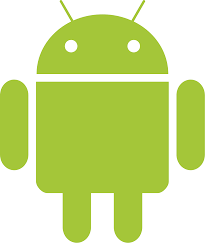

In [4]:
# Original
from IPython.display import Image
Image(file_name)

#### Using resize_multilinear_py

In [5]:
new_size = np.ones((2), dtype=np.int32)
new_size[0] = 100
new_size[1] = 100

(1, 245, 206, 4)
Execution time: 1.1135210990905762
(1, 100, 100, 4)


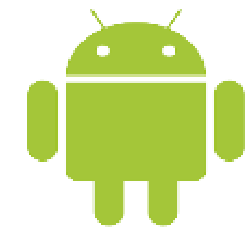

In [6]:
# load image
image = imageio.imread(file_name).astype(np.float32)
image = image[np.newaxis,...]
print(image.shape)

start = time.time()
image_resized = resize_multilinear_py(image, new_size)
print('Execution time:', time.time() - start)
print(image_resized.shape)

fig, ax = plt.subplots()
ax.imshow(image_resized[0, :, :, :])
ax.axis('off')  # clear x-axis and y-axis
plt.show()

#### Using tf.image.resize_bilinear

Execution time: 0.019841909408569336
(1, 100, 100, 3)


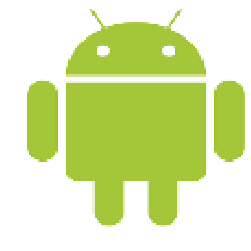

In [7]:
# Using tf.image.resize_bilinear

image_content = tf.read_file(file_path)
image_decoded = tf.image.decode_png(image_content, channels=0)
images = tf.expand_dims(image_decoded, 0)
images_resized = tf.image.resize_bilinear(images, new_size)
images_resized_int = tf.cast(images_resized, tf.int32)

start = time.time()
with tf.Session() as sess:
    tf_result = sess.run(images_resized_int)
print('Execution time:', time.time() - start)
print(tf_result.shape)

fig, ax = plt.subplots()
ax.imshow(tf_result[0, :, :, :])
ax.axis('off')  # clear x-axis and y-axis
plt.show()

# A simple 3D example using the same image
#### Using resize_multilinear_py
1. Building a 3D volume using a black image, the android image and a white image. [1, 245, 206, 3, 4]
[1 batch, height, width, depth, 4 channels]
2. Resize the 3D volume to [1, 100, 100, 5, 4]

Expectations: [1, 100, 100, 2, 4] will be half way darker

Expectations: [1, 100, 100, 4, 4] will be half way brighter

(245, 206, 4)
(1, 245, 206, 3, 4)


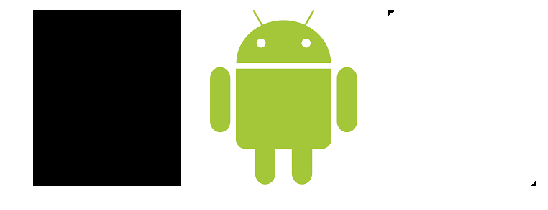

In [8]:
# build the 3d volume
file_name = 'images/android_black.png'
file_path = os.path.join(wk_dir, file_name)
image_black = imageio.imread(file_name).astype(np.float32)
file_name = 'images/android.png'
file_path = os.path.join(wk_dir, file_name)
image_orig = imageio.imread(file_name).astype(np.float32)
file_name = 'images/android_white.png'
file_path = os.path.join(wk_dir, file_name)
image_white = imageio.imread(file_name).astype(np.float32)
print(image_white.shape)

d3_volume = np.zeros((1, 245, 206, 3, 4))
d3_volume[0,:,:,0,:] = image_black
d3_volume[0,:,:,1,:] = image_orig
d3_volume[0,:,:,2,:] = image_white
print(d3_volume.shape)

fig = plt.figure(figsize=(9,10))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(d3_volume[0,:,:,i,:].astype(np.int32))
    ax.axis('off')  # clear x-axis and y-axis
plt.show()

In [9]:
new_size = np.ones((3), dtype=np.int32)
new_size[0] = 100
new_size[1] = 100
new_size[2] = 5

In [12]:
# Do the interpolation
print('Interpolating...')
start = time.time()
image_resized = resize_multilinear_py(d3_volume, new_size)
print('Execution time:', time.time() - start)
print(image_resized.shape)

Interpolating...
Execution time: 10.327733993530273
(1, 100, 100, 5, 4)


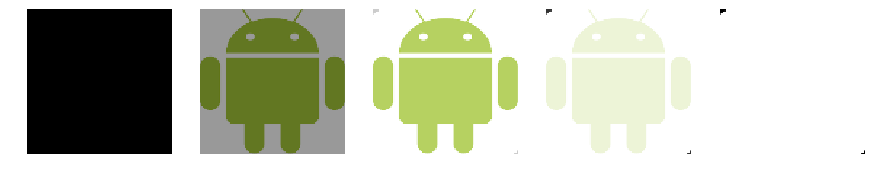

In [13]:
fig = plt.figure(figsize=(15,10))

for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(image_resized[0,:,:,i,:].astype(np.int32))
    ax.axis('off')  # clear x-axis and y-axis
plt.show()

The result looks as expected. :)

But it took 10s to calculate. :(